In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3

In [2]:
con_sqlite = sqlite3.connect("database.sqlite")

In [3]:
sql_query = "SELECT name FROM sqlite_master WHERE type = 'table'"

In [4]:
df = pd.read_sql_query(sql_query, con_sqlite)

In [5]:
print(df)

                name
0    sqlite_sequence
1  Player_Attributes
2             Player
3              Match
4             League
5            Country
6               Team
7    Team_Attributes


In [6]:
Partidos = pd.read_sql_query("SELECT * FROM Match", con_sqlite)
Partidos

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
Partidos.shape

(25979, 115)

Voy a analizar cantidad de goles del local y visitante independientemente de la liga y del año.

In [8]:
Partidos.describe()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,25979.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000,24158.000000,...,17097.000000,22568.000000,22568.000000,22568.000000,14162.000000,14162.000000,14162.000000,14161.000000,14161.000000,14161.000000
mean,12990.000000,11738.630317,11738.630317,18.242773,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938,0.999586,...,4.622343,2.668107,3.899048,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663
std,7499.635658,7553.936759,7553.936759,10.407354,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110,0.022284,...,3.632164,1.928753,1.248221,4.318338,1.489299,0.867440,3.010189,1.507793,0.868272,3.189814
min,1.000000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000,0.000000,...,1.100000,1.030000,1.620000,1.080000,1.050000,1.450000,1.120000,1.040000,1.330000,1.120000
25%,6495.500000,4769.000000,4769.000000,9.000000,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000,1.000000,...,2.500000,1.700000,3.300000,2.550000,1.670000,3.200000,2.500000,1.670000,3.250000,2.500000
50%,12990.000000,10257.000000,10257.000000,18.000000,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000,1.000000,...,3.500000,2.150000,3.500000,3.500000,2.100000,3.300000,3.400000,2.100000,3.400000,3.400000
75%,19484.500000,17642.000000,17642.000000,27.000000,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000,1.000000,...,5.250000,2.800000,4.000000,5.400000,2.650000,3.750000,5.000000,2.620000,3.750000,5.000000
max,25979.000000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000,2.000000,...,41.000000,36.000000,26.000000,67.000000,21.000000,11.000000,34.000000,17.000000,13.000000,34.000000


In [9]:
print(Partidos)

          id  country_id  league_id     season  stage                 date  \
0          1           1          1  2008/2009      1  2008-08-17 00:00:00   
1          2           1          1  2008/2009      1  2008-08-16 00:00:00   
2          3           1          1  2008/2009      1  2008-08-16 00:00:00   
3          4           1          1  2008/2009      1  2008-08-17 00:00:00   
4          5           1          1  2008/2009      1  2008-08-16 00:00:00   
...      ...         ...        ...        ...    ...                  ...   
25974  25975       24558      24558  2015/2016      9  2015-09-22 00:00:00   
25975  25976       24558      24558  2015/2016      9  2015-09-23 00:00:00   
25976  25977       24558      24558  2015/2016      9  2015-09-23 00:00:00   
25977  25978       24558      24558  2015/2016      9  2015-09-22 00:00:00   
25978  25979       24558      24558  2015/2016      9  2015-09-23 00:00:00   

       match_api_id  home_team_api_id  away_team_api_id  home_t

In [10]:
Partidos_definitivos = Partidos.drop(['league_id','country_id','card','cross','corner','shotoff','shoton','goal','foulcommit','possession','date','stage', 'home_player_Y1','home_player_Y2', 'home_player_Y3', 'home_player_Y4' , 'home_player_Y5', 'home_player_Y6', 'home_player_Y7', 'home_player_Y8', 'home_player_Y9', 'home_player_Y10', 'home_player_Y11', 'away_player_Y1', 'away_player_Y2', 'away_player_Y3', 'away_player_Y4', 'away_player_Y5', 'away_player_Y6', 'away_player_Y7', 'away_player_Y8', 'away_player_Y9', 'away_player_Y10', 'away_player_Y11', 'home_player_1', 'home_player_2', 'home_player_3', 'home_player_4', 'home_player_5', 'home_player_6', 'home_player_7', 'home_player_8', 'home_player_9', 'home_player_10', 'home_player_11', 'away_player_1', 'away_player_2', 'away_player_3', 'away_player_4', 'away_player_5', 'away_player_6', 'away_player_7', 'away_player_8', 'away_player_9', 'away_player_10', 'away_player_11','match_api_id','B365H','B365D','B365A', 'home_team_api_id','away_player_X1','away_player_X2','away_player_X3','away_player_X4','away_player_X5','away_player_X6','away_player_X7','away_player_X8','away_player_X9','away_player_X10','away_player_X11','home_player_X1','home_player_X2' ,'home_player_X3','home_player_X4' ,'home_player_X5','home_player_X6','home_player_X5','home_player_X6' ,'home_player_X7' ,'home_player_X8' ,'home_player_X9' ,'home_player_X10' ,'home_player_X11' , 'away_team_api_id','IWH', 'BWA', 'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA', 'IWH', 'LBD', 'LBA', 'PSH', 'PSD','BWH', 'PSA', 'WHH', 'WHD','WHA', 'SJH','BWD', 'SJD','BWA','IWD','IWA','LBH'], axis=1)
Partidos_definitivos
#Queda abierta la posibilidad de segmentar por liga pais o temporada

,id,season,home_team_goal,away_team_goal
0,1,2008/2009,1,1
1,2,2008/2009,0,0
2,3,2008/2009,0,3
3,4,2008/2009,5,0
4,5,2008/2009,1,3
...,...,...,...,...
25974,25975,2015/2016,1,0
25975,25976,2015/2016,1,2
25976,25977,2015/2016,2,0
25977,25978,2015/2016,0,0


In [11]:
Partidos_definitivos.home_team_goal.sum()

40127

In [12]:
Partidos_definitivos.away_team_goal.sum()

30160

In [13]:
PartidosXtemporada = Partidos_definitivos.groupby('season')

In [14]:
PartidosXtemporada.describe()


id                                                       \
            count          mean          std     min      25%      50%   
season                                                                   
2008/2009  3326.0  11557.684606  7684.084014     1.0  4914.25  10547.5   
2009/2010  3230.0  12211.999690  7508.991395   307.0  5366.25  10975.5   
2010/2011  3260.0  12415.815951  7535.592451   517.0  5723.75  11340.5   
2011/2012  3220.0  12665.820497  7498.624923   757.0  6093.75  11700.5   
2012/2013  3260.0  13039.285890  7486.070554   997.0  6483.75  12078.5   
2013/2014  3032.0  14254.445251  6946.526318  1237.0  7034.75  14861.5   
2014/2015  3325.0  13762.997594  7436.789560  1249.0  7260.00  12871.0   
2015/2016  3326.0  14080.749549  7417.488249  1489.0  7640.25  13250.5   

                             home_team_goal            ...             \
                75%      max          count      mean  ...  75%   max   
season                                                 ...              
2008/2009  17837.75  24737.0         3326.0  1.505412  ...  2.0   7.0   
2009/2010  18101.75  24917.0         3230.0  1.541176  ...  2.0   9.0   
2010/2011  18334.25  25097.0         3260.0  1.548466  ...  2.0  10.0   
2011/2012  18566.25  25259.0         3220.0  1.572671  ...  2.0   8.0   
2012/2013  18814.25  25439.0         3260.0  1.550000  ...  2.0   9.0   
2013/2014  20863.25  25619.0         3032.0  1.578826  ...  2.0   7.0   
2014/2015  19344.00  25799.0         3325.0  1.520301  ...  2.0   9.0   
2015/2016  19649.75  25979.0         3326.0  1.543897  ...  2.0  10.0   

          away_team_goal                                               
                   count      mean       std  min  25%  50%  75%  max  
season                                                                 
2008/2009         3326.0  1.101924  1.102621  0.0  0.0  1.0  2.0  7.0  
2009/2010         3230.0  1.131269  1.139176  0.0  0.0  1.0  2.0  7.0  
2010/2011         3260.0  1.135276  1.122908  0.0  0.0  1.0  2.0  8.0  
2011/2012         3220.0  1.143789  1.148824  0.0  0.0  1.0  2.0  7.0  
2012/2013         3260.0  1.222699  1.163039  0.0  0.0  1.0  2.0  7.0  
2013/2014         3032.0  1.187995  1.152629  0.0  0.0  1.0  2.0  7.0  
2014/2015         3325.0  1.155489  1.149296  0.0  0.0  1.0  2.0  8.0  
2015/2016         3326.0  1.210764  1.154169  0.0  0.0  1.0  2.0  9.0  

[8 rows x 24 columns]

In [15]:
Resultados = ['Local', 'Empate', 'Visitante']
Resultados

['Local', 'Empate', 'Visitante']

In [16]:
conditionlist = [
    (Partidos_definitivos['home_team_goal'] > Partidos_definitivos['away_team_goal']) ,
    (Partidos_definitivos['home_team_goal'] == Partidos_definitivos['away_team_goal']) ,
    (Partidos_definitivos['home_team_goal'] < Partidos_definitivos['away_team_goal'])]
Resultados = ['Local', 'Empate', 'Visitante']
Partidos_definitivos['result'] = np.select(conditionlist, Resultados, default='No especificado')

In [17]:
Partidos_definitivos


,id,season,home_team_goal,away_team_goal,result
0,1,2008/2009,1,1,Empate
1,2,2008/2009,0,0,Empate
2,3,2008/2009,0,3,Visitante
3,4,2008/2009,5,0,Local
4,5,2008/2009,1,3,Visitante
...,...,...,...,...,...
25974,25975,2015/2016,1,0,Local
25975,25976,2015/2016,1,2,Visitante
25976,25977,2015/2016,2,0,Local
25977,25978,2015/2016,0,0,Empate


<AxesSubplot:>

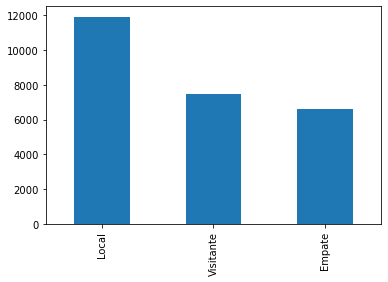

In [18]:
Partidos_definitivos['result'].value_counts().plot.bar()

In [19]:
conditionlist2 = [
    (Partidos_definitivos['home_team_goal']-Partidos_definitivos['away_team_goal'] > 2) ,
    (Partidos_definitivos['away_team_goal']-Partidos_definitivos['home_team_goal'] > 2)]
choicelist2 = ['Goleada', 'Goleada']
Partidos_definitivos['goleadas'] = np.select(conditionlist2, choicelist2, default='No goleada')

In [20]:
Partidos_definitivos

,id,season,home_team_goal,away_team_goal,result,goleadas
0,1,2008/2009,1,1,Empate,No goleada
1,2,2008/2009,0,0,Empate,No goleada
2,3,2008/2009,0,3,Visitante,Goleada
3,4,2008/2009,5,0,Local,Goleada
4,5,2008/2009,1,3,Visitante,No goleada
...,...,...,...,...,...,...
25974,25975,2015/2016,1,0,Local,No goleada
25975,25976,2015/2016,1,2,Visitante,No goleada
25976,25977,2015/2016,2,0,Local,No goleada
25977,25978,2015/2016,0,0,Empate,No goleada


In [21]:
conditionlist3 = [
    (Partidos_definitivos['home_team_goal'] < 1) ,
    (Partidos_definitivos['away_team_goal'] < 1)]
choicelist3 = ['Valla Invicta', 'Valla Invicta']
Partidos_definitivos['Valla Invicta'] = np.select(conditionlist3, choicelist3, default='partido con goles')

In [22]:
Partidos_definitivos

,id,season,home_team_goal,away_team_goal,result,goleadas,Valla Invicta
0,1,2008/2009,1,1,Empate,No goleada,partido con goles
1,2,2008/2009,0,0,Empate,No goleada,Valla Invicta
2,3,2008/2009,0,3,Visitante,Goleada,Valla Invicta
3,4,2008/2009,5,0,Local,Goleada,Valla Invicta
4,5,2008/2009,1,3,Visitante,No goleada,partido con goles
...,...,...,...,...,...,...,...
25974,25975,2015/2016,1,0,Local,No goleada,Valla Invicta
25975,25976,2015/2016,1,2,Visitante,No goleada,partido con goles
25976,25977,2015/2016,2,0,Local,No goleada,Valla Invicta
25977,25978,2015/2016,0,0,Empate,No goleada,Valla Invicta


<AxesSubplot:ylabel='Valla Invicta'>

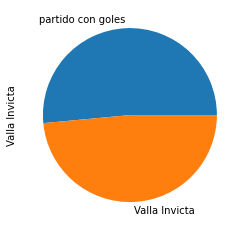

In [23]:
Partidos_definitivos['Valla Invicta'].value_counts().plot.pie()

<AxesSubplot:ylabel='goleadas'>

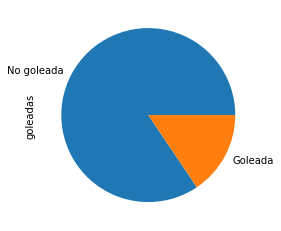

In [24]:
Partidos_definitivos['goleadas'].value_counts().plot.pie()